# Home Loan Defaulter

 

# Exploratory Data Analysis

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

### Importing Required Libraries

In [1]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt

# import seaborn for more plotting options(built on top of matplotlib)
import seaborn as sns

# Supress unnecessary warnings so that the presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# display plots on the notebook itself
%matplotlib inline

### Get the dataset loaded

In [2]:
train = pd.read_csv("application_train.csv")


### How big is the training dataset?

In [3]:
print("The application_train.csv has {} entires.".format(train.shape))


The application_train.csv has (307511, 122) entires.


The application_train.csv has (307511, 122) entires.


### Check out the stats


In [4]:
train.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Lets look at the overview of the data


In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Lets look at available columns and total number of columns


In [6]:
train.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

### How do the first 5 rows look like?- Just a sanity check


In [7]:
train.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Data Analysis


### 2.1 Who is the highest borrower? Male or Female?


<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

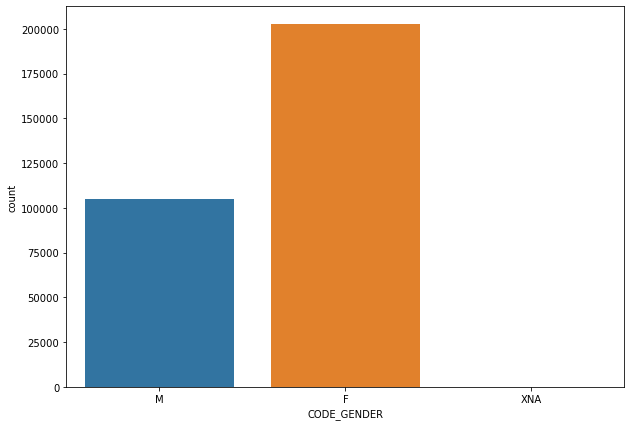

In [8]:

fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER',data=train)

In [9]:
print("Surprisingly, females are the highest borrowers with counts:\n{}".format(train.CODE_GENDER.value_counts()))


Surprisingly, females are the highest borrowers with counts:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


### 2.2 How is the distribution of target labels? - Did most people return on time ?

According to description of the data -"1 indicates client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 indicates all other cases".


<AxesSubplot:xlabel='TARGET', ylabel='count'>

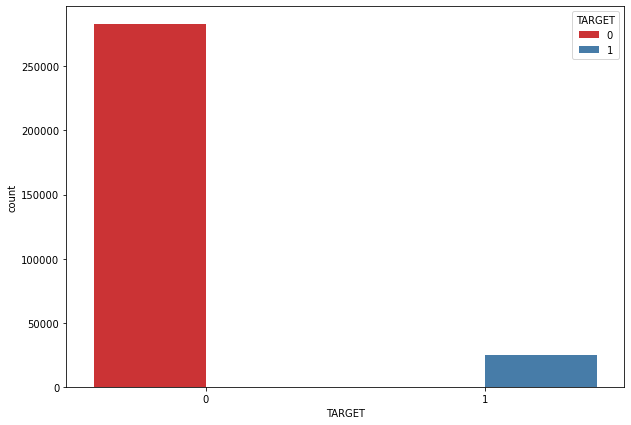

In [10]:

fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x ='TARGET',data=train, hue='TARGET',palette="Set1")

### Based on the description, most people returned the money {1- people with difficulties, 0 - other cases }. Very clearly the target label is imbalanced

### 2.3 Whether is it Female who has more difficulties or is it Male?


<AxesSubplot:xlabel='TARGET', ylabel='count'>

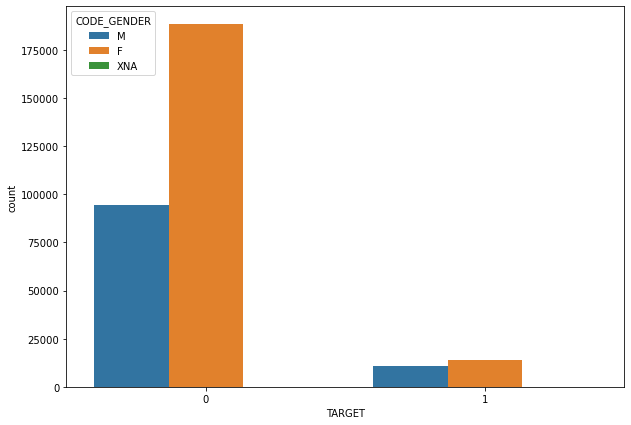

In [11]:

fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='TARGET',hue='CODE_GENDER',data=train)

Females have relatively more difficulties in repaying the loan back, as seen with Target = 1. This could be because of the general larger population of female applicants as opposed to male applicants.

### Is it because they (Male and Female) own car(s) - How many male and female own cars?

### 2.4 Who owns most number of the cars? M or F?


<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

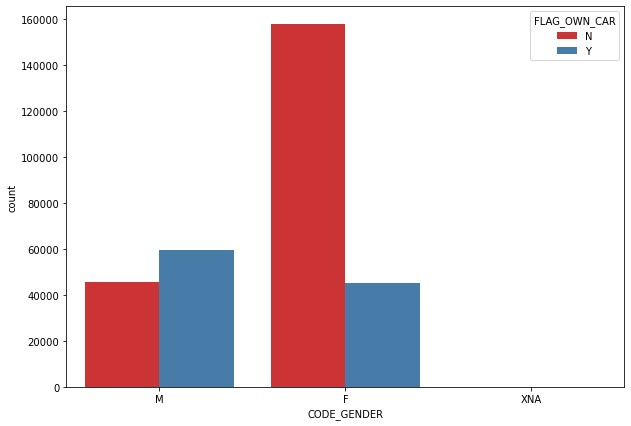

In [12]:

fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER', hue='FLAG_OWN_CAR', data=train,palette="Set1")

### Females own less number of cars.


### 2.5 How old is the client's car(s)? - Are they investing that money in fixing those car(s) or are they using that money to buy a new car?


<AxesSubplot:xlabel='CODE_GENDER', ylabel='OWN_CAR_AGE'>

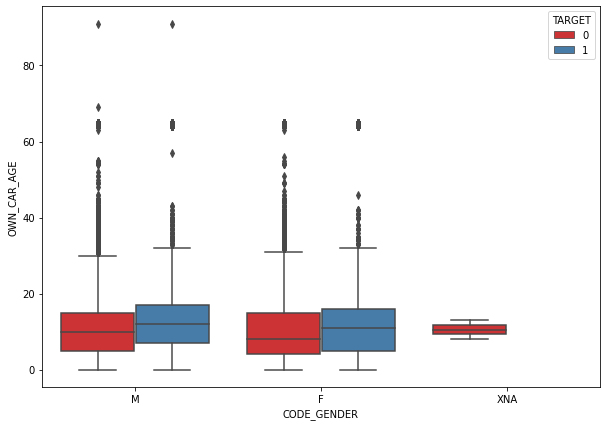

In [13]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='CODE_GENDER',y='OWN_CAR_AGE',hue='TARGET',data=train,palette="Set1")

<AxesSubplot:xlabel='CODE_GENDER', ylabel='OWN_CAR_AGE'>

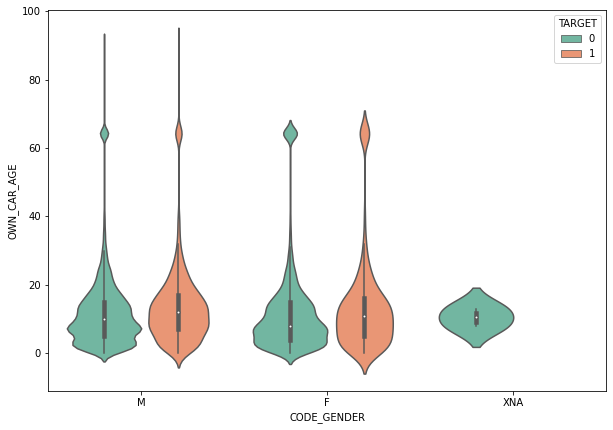

In [14]:
fig, ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='CODE_GENDER',y='OWN_CAR_AGE',hue='TARGET',data=train,palette="Set2")

### People with repaying difficulty mostly have older cars - Are they spending loan money on cars?


### 2.6 How is the frequency of car ages? Normal? Poission? Student's T-distribution?


### How is the distribution of client's car ages? Without KDE or with KDE?- without Norm or with Norm.


<AxesSubplot:xlabel='OWN_CAR_AGE', ylabel='Density'>

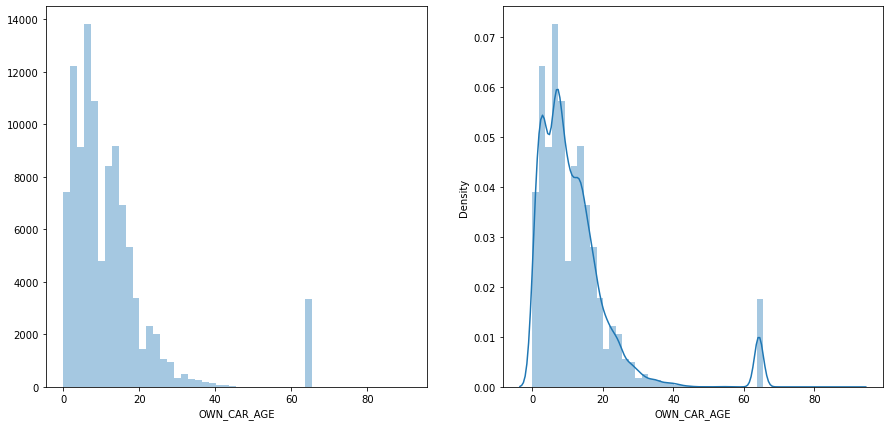

In [15]:
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(15,7))
plt.subplot(1,2,1)
sns.distplot(train['OWN_CAR_AGE'].dropna(),norm_hist=False,kde=False)
plt.subplot(1,2,2)
sns.distplot(train['OWN_CAR_AGE'].dropna(),norm_hist=False,kde=True)

### Looks kind of right skewed normal distribution with a bump near 60+ years! Most clients car is around 10 years.


### 2.7 What is the minimum number of children do clients have?


<AxesSubplot:xlabel='CODE_GENDER', ylabel='CNT_CHILDREN'>

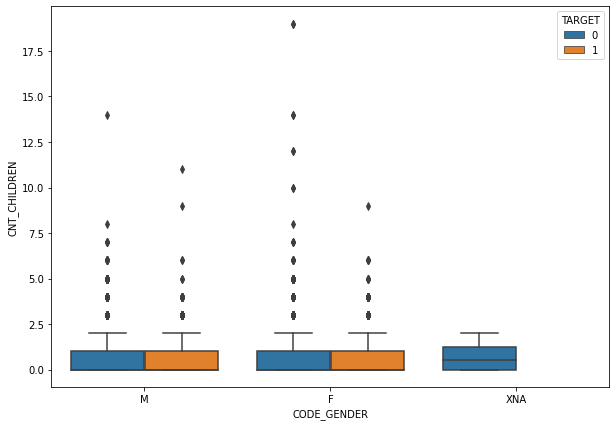

In [16]:

fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='CODE_GENDER',y='CNT_CHILDREN',hue='TARGET',data=train)

### It seems like min children count is 0.


### 2.8 Does having a kid influence repayment?


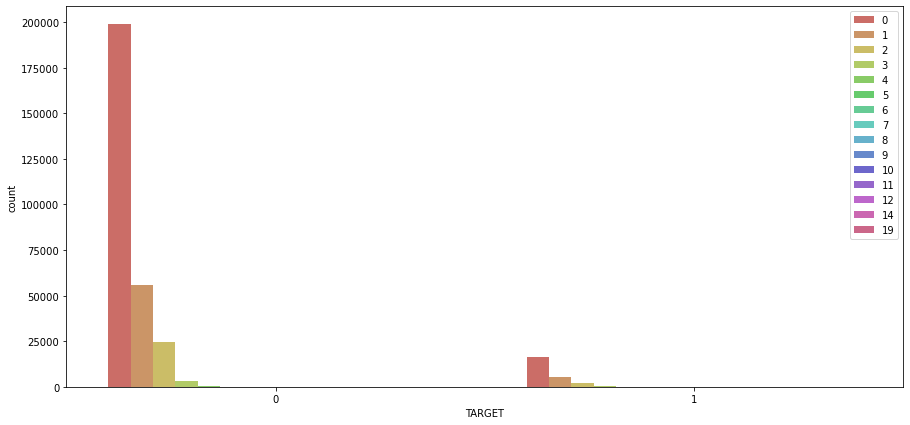

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='TARGET',hue='CNT_CHILDREN',data=train,palette="hls")
plt.legend(loc=1)

### Most borrowers who have no children had no difficulties repaying - having children impacts the repayment process - it slows down by making it difficult for the client.

# 3. Occupation


### 3.1 Who are the major borrowers? - What are their occupations?


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

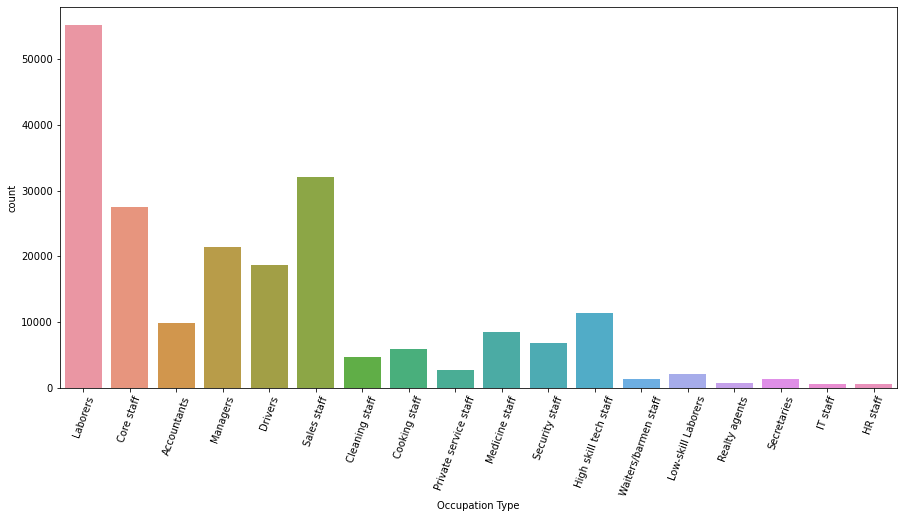

In [18]:

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',data=train)
plt.xlabel("Occupation Type")
plt.xticks(rotation=70)


### Most of the clients are laborers and the least of the clients are IT Staff.


### 3.2 How economically stable are clients? Who are the most and least stable?


Text(0, 0.5, 'Average Annual family income')

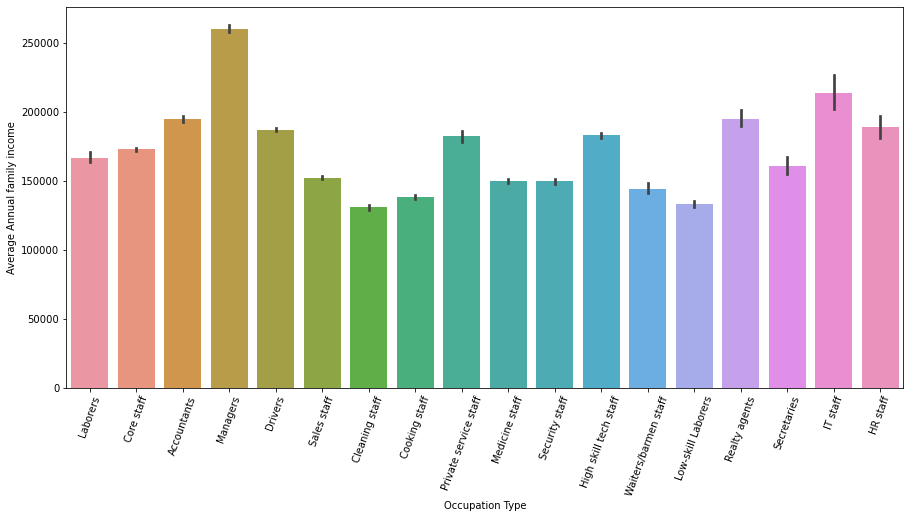

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',data=train)
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Average Annual family income")

### Managers are the most earning borrowers while cleaning staff are the least earning borrowers - Based on the annual family income.

### 3.3 Which category of occupants repay on time and are better clients for company to lend money?

Text(0.5, 0, 'Occupation Type')

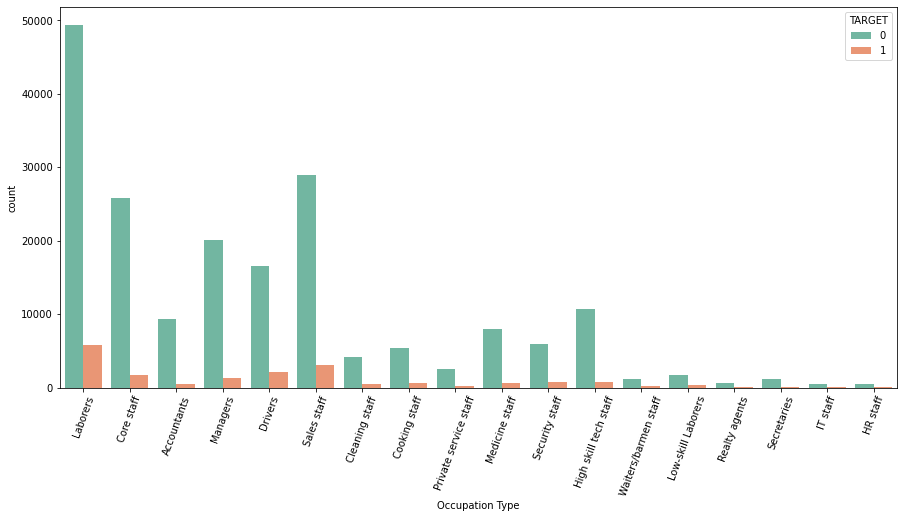

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',hue='TARGET',data=train,palette="Set2")
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")


Right off the bat, it seems as if the labourers have the highest difficulty in repaying. Also it seems lending to Reality agents, IT staff, HR staff is the safest.

This is not a better way to conclude, because this contains baised number of applicants. A better way is to find a metric that incorporates relative relationship between applicants count and repayers count.

Let us look at the number of repayer's to number of applicants ratio in every occupation category.

In [21]:
# get the number of people having occupation type and target grouped.
Occupation_df = pd.DataFrame(data=train.groupby(['OCCUPATION_TYPE','TARGET']).count()['SK_ID_CURR'])

In [22]:
Occupation_df

SK_ID_CURR
OCCUPATION_TYPE       TARGET            
Accountants           0             9339
                      1              474
Cleaning staff        0             4206
                      1              447
Cooking staff         0             5325
                      1              621
Core staff            0            25832
                      1             1738
Drivers               0            16496
                      1             2107
HR staff              0              527
                      1               36
High skill tech staff 0            10679
                      1              701
IT staff              0              492
                      1               34
Laborers              0            49348
                      1             5838
Low-skill Laborers    0             1734
                      1              359
Managers              0            20043
                      1             1328
Medicine staff        0             7965
                      1              572
Private service staff 0             2477
                      1              175
Realty agents         0              692
                      1               59
Sales staff           0            29010
                      1             3092
Secretaries           0             1213
                      1               92
Security staff        0             5999
                      1              722
Waiters/barmen staff  0             1196
                      1              152

In [23]:
value_counts = Occupation_df['SK_ID_CURR'].values


In [24]:
value_counts

array([ 9339,   474,  4206,   447,  5325,   621, 25832,  1738, 16496,
        2107,   527,    36, 10679,   701,   492,    34, 49348,  5838,
        1734,   359, 20043,  1328,  7965,   572,  2477,   175,   692,
          59, 29010,  3092,  1213,    92,  5999,   722,  1196,   152],
      dtype=int64)

In [25]:
def repayers_to_applicants_ratio(values):
    """
    Finds the ratio of Repayers to Applicants. This kind of is a 
    measure for safety. Larger the value better the applicant - More 
    safe for the company to lend loan to this category of workers.
    
    values: array of entires whose counts are given
    returns the repayers to applicants ratio. 
    
    precondition: The counts are such that the targets alligned are
    in order 0 and 1
    """
    flag = 1
    ratios = []
    for count in range(len(values)):
        if flag == 1:
            current_number = values[count]
            next_number = values[count+1]
            ratios.append(current_number/(current_number+next_number))
            ratios.append(current_number/(current_number+next_number))
        flag=flag*-1
    return ratios 

In [26]:
# find the ratios from the array values
Occupation_df['Ratio R/A'] = repayers_to_applicants_ratio(value_counts)

In [27]:
# get the ratio and values based on the order of saftety.

Occupation_ratio_df = Occupation_df.groupby(['OCCUPATION_TYPE','Ratio R/A']).count().drop(['SK_ID_CURR'],axis=1)
Occupation_ratio_df = Occupation_ratio_df.reset_index() 
Occupation_ratio_df = Occupation_ratio_df.sort_values(['Ratio R/A'],ascending=False)
Occupation_ratio_df

,OCCUPATION_TYPE,Ratio R/A
0,Accountants,0.951697
6,High skill tech staff,0.938401
10,Managers,0.937860
3,Core staff,0.936960
5,HR staff,0.936057
7,IT staff,0.935361
12,Private service staff,0.934012
11,Medicine staff,0.932998
15,Secretaries,0.929502
13,Realty agents,0.921438


Text(0, 0.5, 'Mean R/A Ratio')

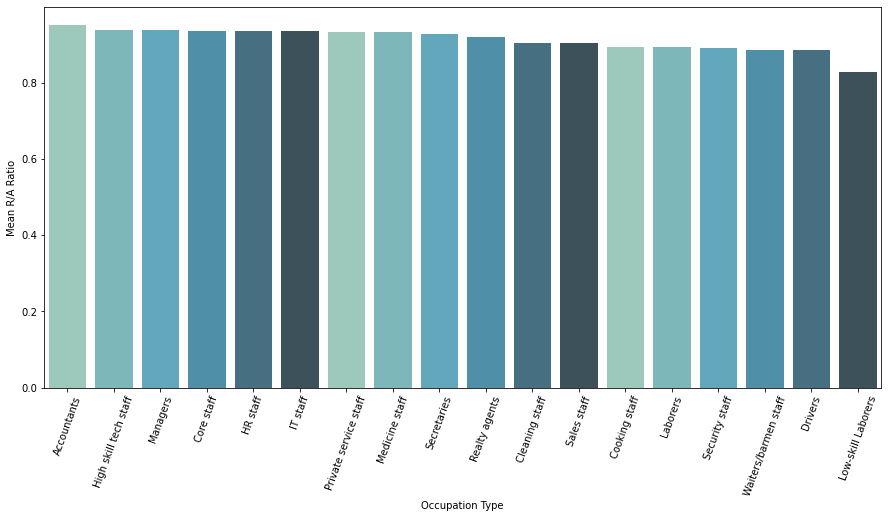

In [28]:
fig,ax = plt.subplots(figsize = (15,7))
sns.barplot(x='OCCUPATION_TYPE',y='Ratio R/A',data=Occupation_ratio_df,palette=sns.color_palette("GnBu_d"))
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Mean R/A Ratio")

### According to the ratio of Number of repayers to Number of applicants in every occupation type, we see that it is most safe to lend money to Accountants with an R/A ratio of 0.9516 and it is least safe to lend money to low skilled labourers with an R/A ratio of 0.8284.

### 3.4 How is the distribution of males and females in terms of loan safety given that they belong to a specific occupation?

### This question requires us to find the probabilities of repaying given a specific gender and a specific occupation type.

In [29]:

# merge the new column 'Ratio R/A' to the train dataframe.
train = pd.merge(left=train,right=Occupation_ratio_df,on='OCCUPATION_TYPE')

Text(0.5, 0, 'Gender')

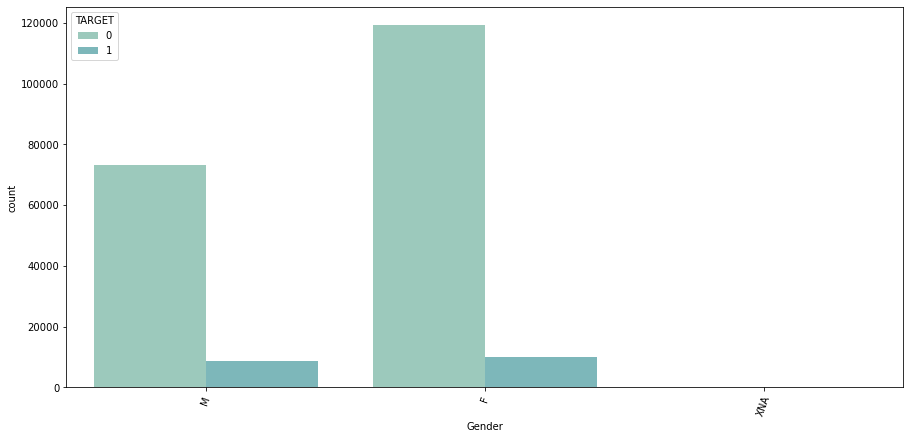

In [30]:
# Find out what is the probability that an applicant will return given that he/she is a male/Female respectively.
fig,ax = plt.subplots(figsize = (15,7))
sns.countplot(x='CODE_GENDER',data=train,hue='TARGET',palette=sns.color_palette("GnBu_d"))
plt.xticks(rotation=70)
plt.xlabel("Gender")

In [31]:
# Find out what is the probability that an applicant will return given that he/she is a male/Female respectively.
pd.DataFrame(train.groupby(['CODE_GENDER','TARGET']).count()['SK_ID_CURR']).reset_index() 

,CODE_GENDER,TARGET,SK_ID_CURR
0,F,0,119311
1,F,1,9971
2,M,0,73260
3,M,1,8576
4,XNA,0,2


In [32]:
### To find out the probability here's what we have to do:
print("probability that an applicant will repay the given that he is a male P(R|M): 73260/(73260+8576) = 0.8952") 
print("probability that an applicant will repay the given that she is a female P(R|F): 119311/(119311+9971) = 0.9228")

probability that an applicant will repay the given that he is a male P(R|M): 73260/(73260+8576) = 0.8952
probability that an applicant will repay the given that she is a female P(R|F): 119311/(119311+9971) = 0.9228


In [33]:

# Let us create a new dataframe where the probabilites of repaying based on gender is included. GR/A stands
# for Gender based repayment ratio.
gender_repay_ratio = pd.DataFrame({"CODE_GENDER":['M','F'],"GR/A":[0.8952,0.9228]})

In [34]:

# Merge this dataframe with the old train dataframe
train = pd.merge(left=train,right=gender_repay_ratio,on='CODE_GENDER')


In [35]:

# lets create a new column that's indicative of repayment with gender and occupation type which is just the product of Ratio R/A with G R/A.
# EGR/A stands for employment gender repayment ratio.
train['EGR/A'] = train['Ratio R/A']*train['GR/A']

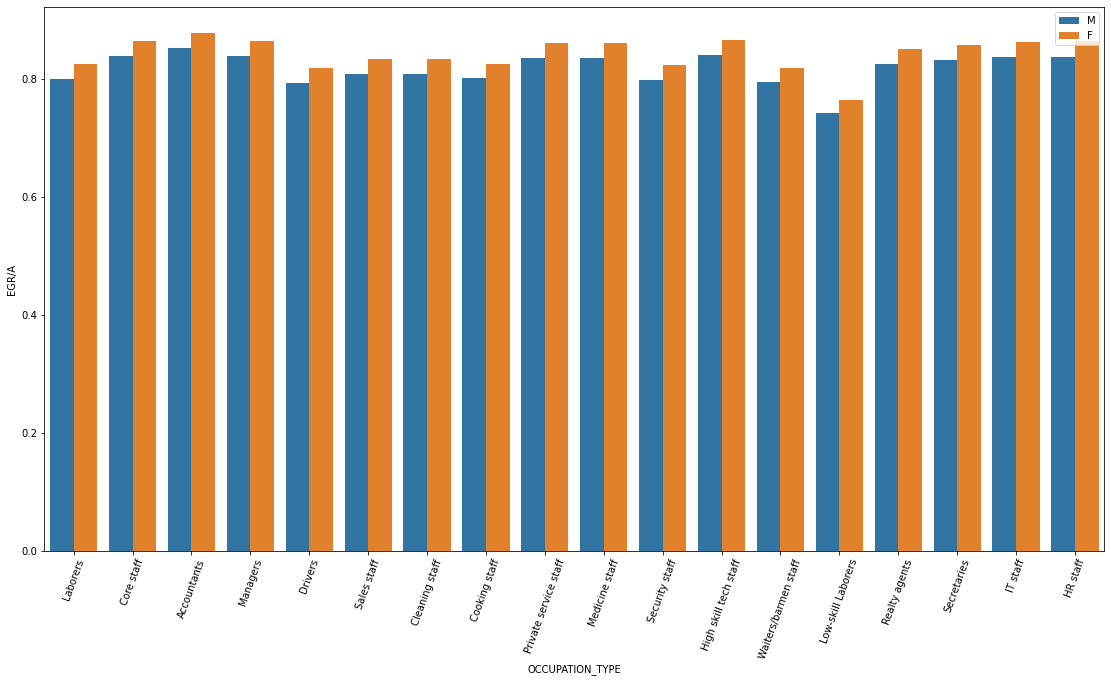

In [36]:
fig,ax = plt.subplots(figsize = (19,10))
plt.xticks(rotation=70)
sns.barplot(x='OCCUPATION_TYPE',y='EGR/A',hue='CODE_GENDER',data=train)
plt.legend(loc=1)

So, in every occupation type, females are more likely to repay the loan on time.


### 3.5 Which occupation category has the highest number of kids?


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

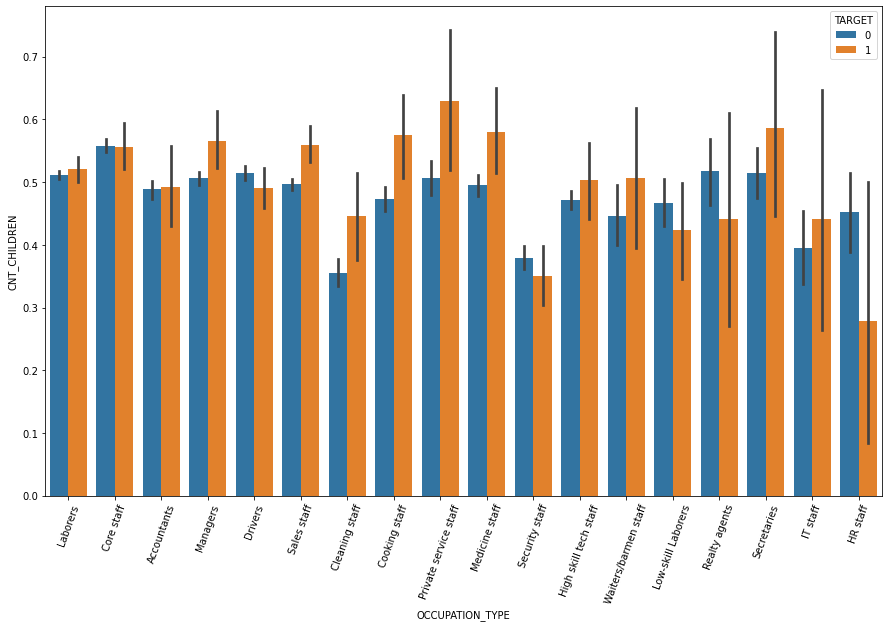

In [37]:
fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(x='OCCUPATION_TYPE',y='CNT_CHILDREN',hue='TARGET',data=train)
plt.xticks(rotation=70)


Right off the bat, private service staff have the highest number of kids and thus have the highest difficulty in repaying because of kids - presumably.

3.6 Which occupation category are the highest loan recipients?


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

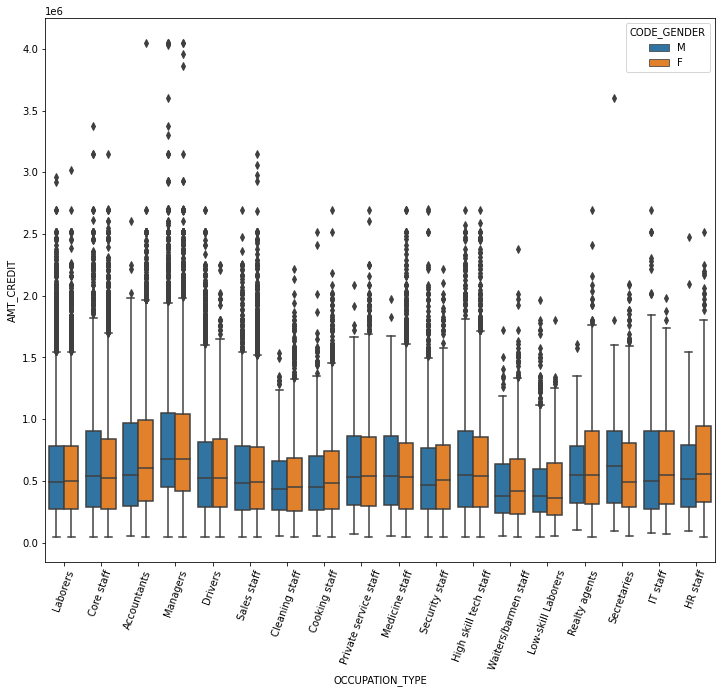

In [38]:
plt.figure(figsize=(12,10))
sns.boxplot(x='OCCUPATION_TYPE',y='AMT_CREDIT',data=train,hue='CODE_GENDER')
plt.xticks(rotation=70)


Accountants and Managers are the highest amount (facevalue) recipents, while low skilled laborers are the least recipents (let me make it clear- labourers are highest volume based applicants, but not large (facevalue) recipents ). It makes sense because accountants are more likely to get a large credit approved as opposed to low skilled laborers - which was kinda explained in the Ratio R/A in Sec 3.31.

### 4. Real estate


### 4.1 How many clients have real estate?


<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='count'>

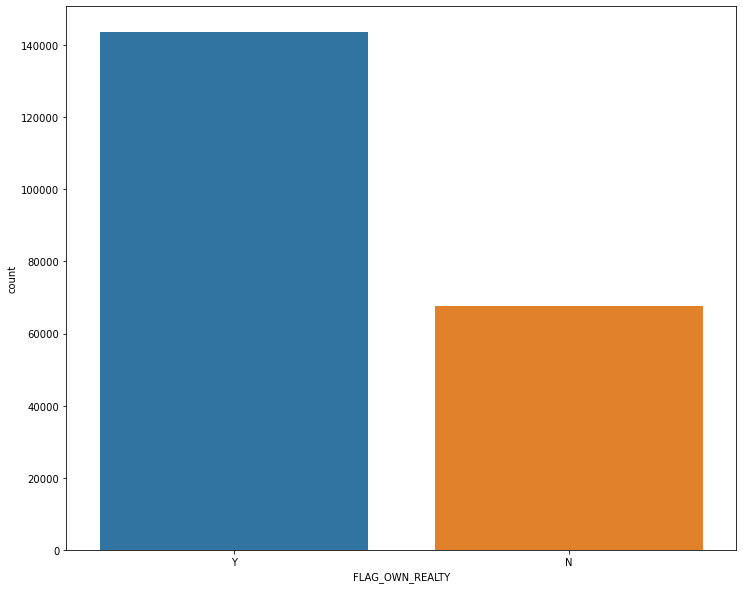

In [39]:
plt.figure(figsize=(12,10))
sns.countplot(x='FLAG_OWN_REALTY', data=train)

### Over 200k applicants have real estate and over 95k applicants don't have.

### 4.2 How does having real estate influence repaying?


<AxesSubplot:xlabel='TARGET', ylabel='count'>

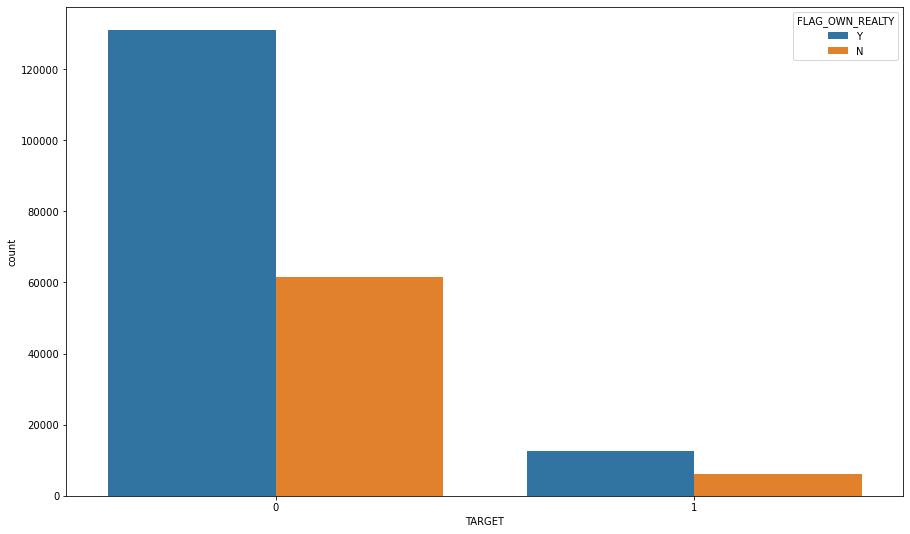

In [40]:

fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(x='TARGET',hue='FLAG_OWN_REALTY',data=train)

In [41]:
reality_with_difficulty = len(train[(train['FLAG_OWN_REALTY']=='Y') & (train['TARGET']==1)])
reality_without_difficulty = len(train[(train['FLAG_OWN_REALTY']=='Y') & (train['TARGET']==0)])
no_reality_with_difficulty = len(train[(train['FLAG_OWN_REALTY']=='N') & (train['TARGET']==1)])
no_reality_without_difficulty = len(train[(train['FLAG_OWN_REALTY']=='N') & (train['TARGET']==0)])

In [42]:

print("Defaulters with realestate % = ",100*reality_with_difficulty/(reality_with_difficulty+reality_without_difficulty))
print("Defaulters without realestate % = ",100*no_reality_with_difficulty/(no_reality_with_difficulty+no_reality_without_difficulty))

Defaulters with realestate % =  8.728533823590858
Defaulters without realestate % =  8.905509478672986


Surprisingly, more defaulters are those who don't have realestate!

### 4.3 How is the living area distributed? (the dataset itself is normalized by default)


<AxesSubplot:xlabel='LIVINGAREA_MEDI', ylabel='Density'>

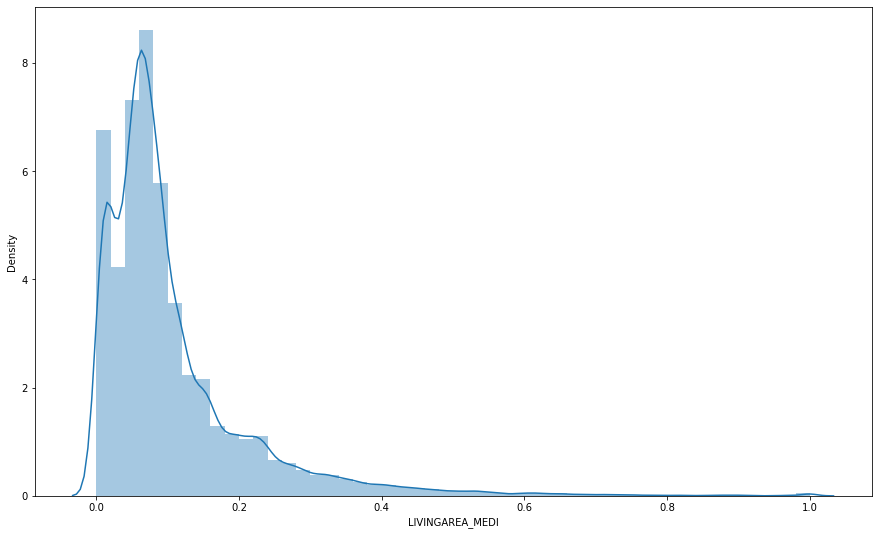

In [43]:
fig, ax = plt.subplots(figsize=(15,9))
sns.distplot(train['LIVINGAREA_MEDI'].dropna())


### As one can tell, the median living area is almost normal, right skewed based on the KDE.


### 4.4 How is the distribution of median number of floors?


<AxesSubplot:xlabel='FLOORSMAX_MEDI', ylabel='Density'>

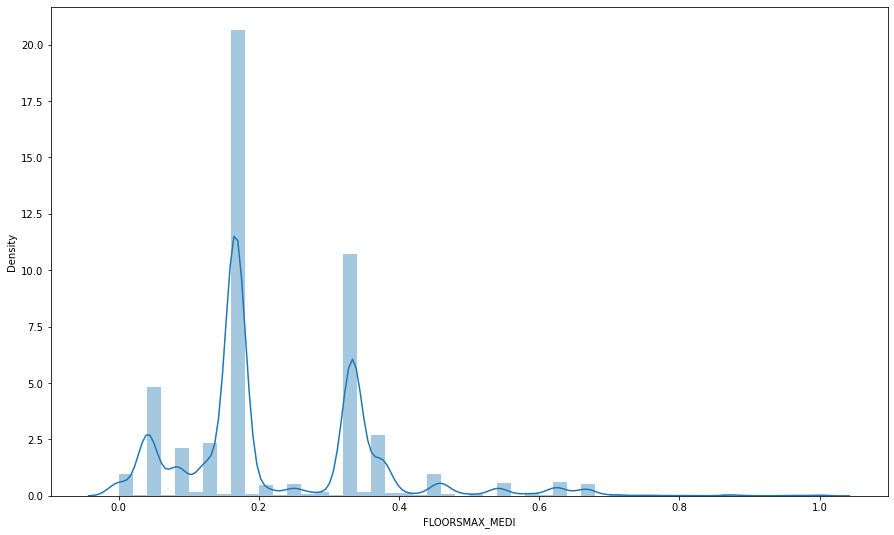

In [44]:
    fig, ax = plt.subplots(figsize=(15,9))
sns.distplot(train['FLOORSMAX_MEDI'].dropna())

### 4.5 What is the median number of max floors for people with difficulty and people without difficulty?


<AxesSubplot:xlabel='TARGET', ylabel='FLOORSMAX_MEDI'>

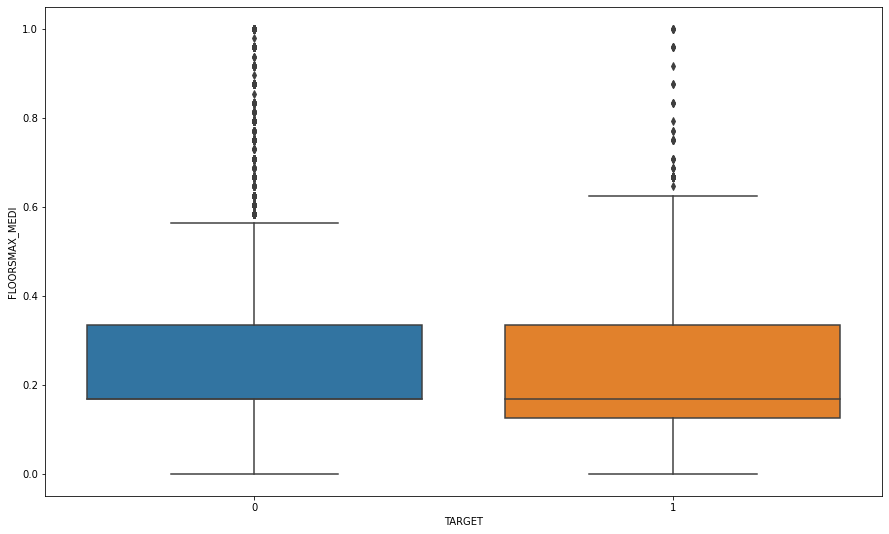

In [45]:
fig, ax = plt.subplots(figsize=(15,9))
sns.boxplot(x='TARGET',y='FLOORSMAX_MEDI',data=train)

### People with difficulty had more number of median floors spread out.


### How is the correlation between Average Living Area and Average Common area?


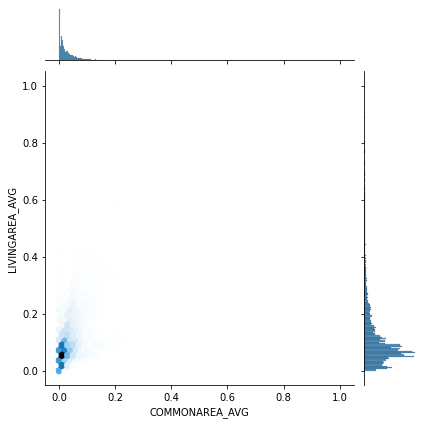

In [46]:
sns.jointplot(x='COMMONAREA_AVG',y='LIVINGAREA_AVG',data=train,kind='hex')


P - Correlation is about 0.55!



### Modelling

### Correlation Matrix

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [47]:
#Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = train.corr().abs()
#corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()


#Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))


There are 35 columns to remove.


In [48]:
to_drop


['AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'EGR/A']

In [49]:
to_drop =['REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_POPULATION_RELATIVE']


In [50]:
print('Training shape: ', train.shape)
train = train.drop(columns = to_drop)
print('New Training shape: ', train.shape)


Training shape:  (211118, 125)
New Training shape:  (211118, 90)


### Handling missing values


<AxesSubplot:>

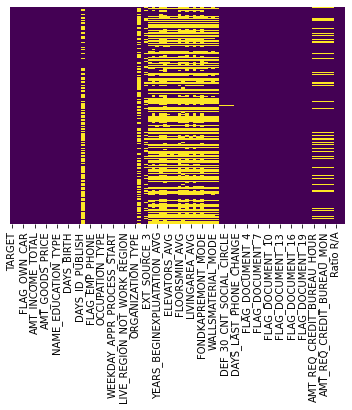

In [51]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [52]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [53]:

# Missing values statistics
missing_values = missing_values_table(train)
missing_values.head(40)

Your selected dataframe has 90 columns.
There are 37 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,147666,69.9
NONLIVINGAPARTMENTS_AVG,146756,69.5
FONDKAPREMONT_MODE,144471,68.4
LIVINGAPARTMENTS_AVG,144455,68.4
FLOORSMIN_AVG,143415,67.9
YEARS_BUILD_AVG,140567,66.6
OWN_CAR_AGE,130941,62.0
LANDAREA_AVG,125232,59.3
BASEMENTAREA_AVG,123521,58.5
NONLIVINGAREA_AVG,116574,55.2


In [54]:
train.select_dtypes('object').isnull().sum()


NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                  907
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                    0
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            144471
HOUSETYPE_MODE                105936
WALLSMATERIAL_MODE            107389
EMERGENCYSTATE_MODE           100114
dtype: int64

In [56]:

categorical_vars = [var for var in train.columns if train[var].isnull().mean()>0 and
                   train[var].dtypes=='O']
categorical_vars

['NAME_TYPE_SUITE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [57]:

numeric_vars=missing_values.index.tolist()
numeric_vars = [e for e in numeric_vars if e not in categorical_vars]
numeric_vars

['COMMONAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_AVG',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_AVG',
 'BASEMENTAREA_AVG',
 'NONLIVINGAREA_AVG',
 'ELEVATORS_AVG',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'ENTRANCES_AVG',
 'LIVINGAREA_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'TOTALAREA_MODE',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS']

In [58]:

from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(missing_values=np.nan, strategy='median')


train[numeric_vars] = imputer.fit_transform(train[numeric_vars])

In [59]:
print(train['NAME_TYPE_SUITE'].mode())

0    Unaccompanied
dtype: object


In [60]:
train['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)


In [62]:
print(train['OCCUPATION_TYPE'].mode())


0    Laborers
dtype: object


In [63]:
train['OCCUPATION_TYPE'].fillna('Laborers',inplace=True)


In [64]:
print(train['FONDKAPREMONT_MODE'].mode())


0    reg oper account
dtype: object


In [65]:
train['FONDKAPREMONT_MODE'].fillna('reg oper account',inplace=True)


In [66]:
print(train['HOUSETYPE_MODE'].mode())


0    block of flats
dtype: object


In [67]:
train['HOUSETYPE_MODE'].fillna('block of flats',inplace=True)


In [68]:
print(train['WALLSMATERIAL_MODE'].mode())


0    Panel
dtype: object


In [69]:
train['WALLSMATERIAL_MODE'].fillna('Panel',inplace=True)


In [70]:
print(train['EMERGENCYSTATE_MODE'].mode()) 


0    No
dtype: object


In [71]:
train['EMERGENCYSTATE_MODE'].fillna('No',inplace=True)


In [72]:
train.isnull().sum().sum()


0

In [73]:
train.shape


(211118, 90)

### Encoding

Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories.



In [74]:
from sklearn.preprocessing import LabelEncoder


In [75]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])
                       
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


5 columns were label encoded.


In [77]:

# one-hot encoding of categorical variables
train = pd.get_dummies(train)

print('Features shape: ', train.shape)

Features shape:  (211118, 207)


Domain Knowledge Features

CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income

ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income

CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due)

DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [79]:
train['CREDIT_INCOME_PERCENT'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']
train['ANNUITY_INCOME_PERCENT'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']
train['CREDIT_TERM'] = train['AMT_ANNUITY'] / train['AMT_CREDIT']
train['DAYS_EMPLOYED_PERCENT'] = train['DAYS_EMPLOYED'] / train['DAYS_BIRTH']


In [80]:
train.to_csv('cleandata.csv', index=False)


### Supervised Learning Technique

This notebook show how Supervised Machine Learning techniques can be used to predict the Loan defaulters

Algorithms used:

Logistic regression

Random Forest

Extreme Gradient Boost

Also I have used SMOTE and Random OverSampler to balance the class.

### Load the data


In [81]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import sys
import warnings
warnings.filterwarnings("ignore")

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [82]:
application_train = pd.read_csv('cleandata.csv')


### Modeling

### Partitioning



In [83]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = application_train[application_train['TARGET']==1]

Valid = application_train[application_train['TARGET']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

print('outlier_fraction for the whole dataset:')
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))


outlier_fraction for the whole dataset:
0.09631252888545004
Fraud Cases : 18547
Valid Cases : 192571


In [84]:
from sklearn.model_selection import train_test_split

#Create independent and Dependent Features
columns = application_train.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["TARGET"]]
# Store the variable we are predicting 
target = "TARGET"
# Define a random state 
state = np.random.RandomState(42)
X = application_train[columns]
y = application_train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(168894, 210) (168894,)
(42224, 210) (42224,)


### More Feature Selection


using RandomForestClassifier



In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [86]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=state))
sel.fit(X_train, y_train)


SelectFromModel(estimator=RandomForestClassifier(random_state=RandomState(MT19937) at 0x25D48AA8C40))

In [87]:
sel.get_support()


array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [88]:

selected_feat= X_train.columns[(sel.get_support())].tolist()
len(selected_feat)

46

In [89]:
print(selected_feat)


['FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_WORK_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'Ratio R/A', 'EGR/A', 'NAME_FAMILY_STATUS_Married', 'ORGANIZATION_TYPE_Business Entity Type 3', 'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']


In [90]:


app_X_train = X_train.copy() #Taking a copy before dropping 
app_X_test = X_test.copy()

In [91]:

X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

In [92]:
print (X_train.shape, X_test.shape)

(168894, 46) (42224, 46)


### Logistic Regression


In [93]:
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(C = 2)

In [94]:
logistic_regressor.fit(X_train,y_train)


LogisticRegression(C=2)

In [95]:
y_pred = logistic_regressor.predict(X_test)


In [96]:
from sklearn.metrics import classification_report,accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Logistic Regression errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Logistic Regression errors: 3737
Accuracy Score :
0.9114958317544525
Confusion matrix :
[[38487     3]
 [ 3734     0]]
Classification Report :
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     38490
           1       0.00      0.00      0.00      3734

    accuracy                           0.91     42224
   macro avg       0.46      0.50      0.48     42224
weighted avg       0.83      0.91      0.87     42224

ROC AUC score is:  0.4999610288386594


Random Forest - Bagging ensemble of Decision trees


In [97]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100, random_state = state, verbose = 1, n_jobs = -1)


In [98]:
random_forest.fit(X_train,y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   53.7s finished


RandomForestClassifier(n_jobs=-1,
                       random_state=RandomState(MT19937) at 0x25D48AA8C40,
                       verbose=1)

In [99]:
y_pred = random_forest.predict(X_test) 


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.2s finished


In [101]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Random Forest errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Random Forest errors: 3731
Accuracy Score :
0.9116379310344828
Confusion matrix :
[[38478    12]
 [ 3719    15]]
Classification Report :
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     38490
           1       0.56      0.00      0.01      3734

    accuracy                           0.91     42224
   macro avg       0.73      0.50      0.48     42224
weighted avg       0.88      0.91      0.87     42224

ROC AUC score is:  0.5018526852528701


Extreme Gradient Boost Model


In [102]:
from xgboost import XGBClassifier


In [103]:
xgb_classifier = XGBClassifier(n_estimators=100,max_depth=5)


In [104]:
xgb_classifier.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [105]:
y_pred = xgb_classifier.predict(X_test)


In [106]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Extreme Gradient Boost errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Extreme Gradient Boost errors: 3734
Accuracy Score :
0.9115668813944676
Confusion matrix :
[[38371   119]
 [ 3615   119]]
Classification Report :
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     38490
           1       0.50      0.03      0.06      3734

    accuracy                           0.91     42224
   macro avg       0.71      0.51      0.51     42224
weighted avg       0.88      0.91      0.87     42224

ROC AUC score is:  0.5143887984594667


Here we can see ROC AUC score is best for Extreme Gradient Boost Model
So we can tell that XGB model is the best among the three models